In [ ]:
pip install numpy pandas tensorflow scikit-learn matplotlib

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_csv("/content/sample_data/bitcoin gfg.csv")  # Replace with your dataset
prices = df['Close'].values.reshape(-1, 1)

# Normalize prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)


In [ ]:
#Create Sequences for LSTM
import numpy as np

def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30
X, y = create_sequences(scaled_prices, time_steps)


In [ ]:
train_size = int(len(X) * 0.6)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
#Build the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test)) #Train the Model:


Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.5893e-04 - val_loss: 0.0016
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.1621e-04 - val_loss: 0.0060
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 1.1112e-04 - val_loss: 0.0037
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1.2918e-04 - val_loss: 0.0032
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.2891e-04 - val_loss: 0.0043
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.1211e-04 - val_loss: 0.0086
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.2272e-04 - val_loss: 0.0039
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 8.0850e-05 - val_loss: 0.0012
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 8.9602e-05 - val_loss: 0.0025
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 9.7413e-05 - val_loss: 0.0049
Epoch 12/50
51/51 ━━━━━

In [ ]:
#Evaluate the Model:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


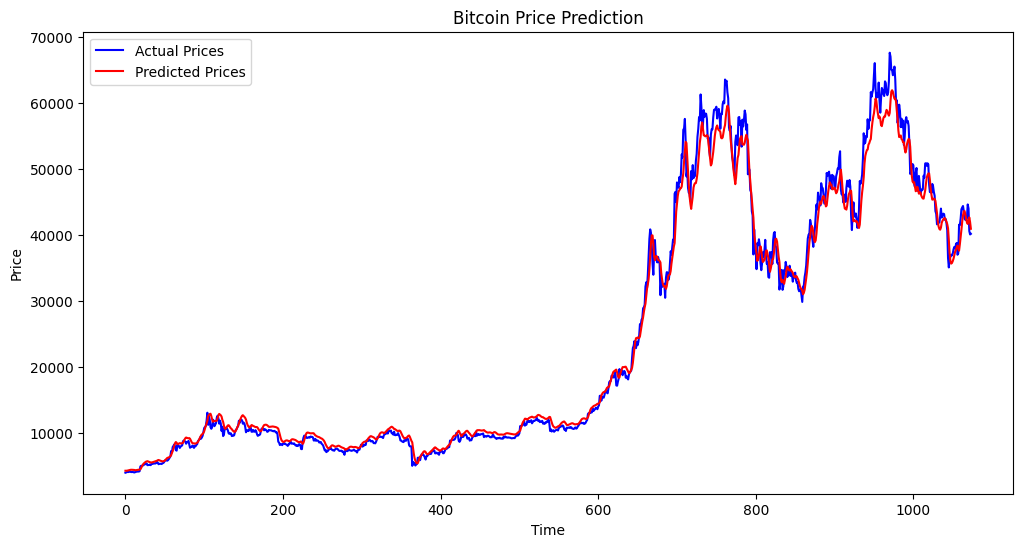

In [ ]:
#Visualize results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
mape = np.mean(np.abs((actual_prices - predictions) / actual_prices)) * 100
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

Mean Absolute Percentage Error: 5.71%


For Ensemble Models (XGBoost)

In [ ]:
pip install xgboost


In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

xgb_predictions = xgb_model.predict(X_test.reshape(X_test.shape[0], -1))

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost MSE: {mse}")

XGBoost MSE: 0.19134201657336317


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Mean Squared Error (MSE)
mse = mean_squared_error(actual_prices, predictions)
rmse = mse ** 0.5  # Root Mean Squared Error

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_prices, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 17715919.68633022
Root Mean Squared Error: 4209.028354184636
Mean Absolute Error: 3396.079667232425


In [ ]:
# Calculate trends: 1 for increase, 0 for decrease
actual_trend = (actual_prices[1:] > actual_prices[:-1]).astype(int)
predicted_trend = (predictions[1:] > predictions[:-1]).astype(int)

# Compute accuracy
trend_accuracy = (actual_trend == predicted_trend).mean() * 100
print(f"Trend Prediction Accuracy: {trend_accuracy:.2f}%")

Trend Prediction Accuracy: 48.88%
